In [457]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import plotly.express as px
import os

Setting working directory

In [392]:
os.chdir('/Users/jesseveilleux/Desktop/RE-market-CT/All Workbooks')

In [393]:
print(os.getcwd())

/Users/jesseveilleux/Desktop/RE-market-CT/All Workbooks


Loading housing data

In [394]:
house_name = 'House Prices 2001-2020 in CT.csv'
house_path = os.path.join('DataSets', house_name)

In [395]:
house_path

'DataSets/House Prices 2001-2020 in CT.csv'

In [396]:
dtype_housing = {'Serial Number': int,
    'List Year': int,
    'Date Recorded': str,
    'Town': str,
    'Address': str,
    'Assessed Value': float,
    'Sale Amount': float,
    'Sales Ratio': float,
    'Property Type': str,
    'Residential Type': str,
    'Non Use Code': str,
    'Assessor Remarks': str,
    'OPM remarks': str,
    'Location': str}

In [397]:
housing_df = pd.read_csv(house_path, dtype=dtype_housing)

The housing data was loaded and data types were identified 

Exploring the data to check columns and years in data

In [398]:
housing_df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [399]:
sorted_years = sorted(housing_df['List Year'].unique())
print(sorted_years)

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Verified unique years in dataset

Load and merge CTDOT data with housing data

In [400]:
DOT_name = 'CTDOT_State_Routes_and_Local_Roads.csv'
DOT_path = os.path.join('DataSets', DOT_name)

In [401]:
merge_df = pd.merge(housing_df, ctDOT_df, how='inner', left_on='Serial Number', right_on='OBJECTID')

In [402]:
merge_df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location', 'OBJECTID', 'ROUTE_ID', 'BEGIN_POINT', 'END_POINT',
       'ROUTE_DIR', 'ROUTE_PREFIX', 'ROUTE_NUMBER', 'ROUTE_SUFFIX',
       'RAMP_NUMBER', 'RAMP_SUFFIX', 'ROAD_TYPE', 'TOWN_NUMBER', 'TOWN_NAME',
       'PRI_SEC_STATUS', 'YEAR', 'GlobalID', 'Shape__Length'],
      dtype='object')

In [403]:
# confirm ID and S/N are equal
#matching_rows = merge_df[['Serial Number', 'OBJECTID']]
#matching_rows

Merged data on common column 

Extract year and month from 'Date Recorded' column

In [404]:
housing_df['Date Recorded'] = pd.to_datetime(housing_df['Date Recorded'])

housing_df['Year'] = housing_df['Date Recorded'].dt.year
housing_df['Month'] = housing_df['Date Recorded'].dt.month

Analyze monthly house sales

In [405]:
houses_sold = housing_df.groupby(['Year','Month']).size().reset_index(name='HousesSold')

In [406]:
# Calculate the total number of houses sold per month
monthly_sales = houses_sold.groupby('Month')['HousesSold'].sum().reset_index(name='TotalSales')

In [407]:
# Sort to find the most popular months
most_popular_months = monthly_sales.sort_values(by='TotalSales', ascending=False)
most_popular_months

,Month,TotalSales
5,6.0,103461
6,7.0,102691
7,8.0,101953
4,5.0,87843
9,10.0,87499
8,9.0,86764
11,12.0,82380
10,11.0,78256
3,4.0,76364
2,3.0,71821


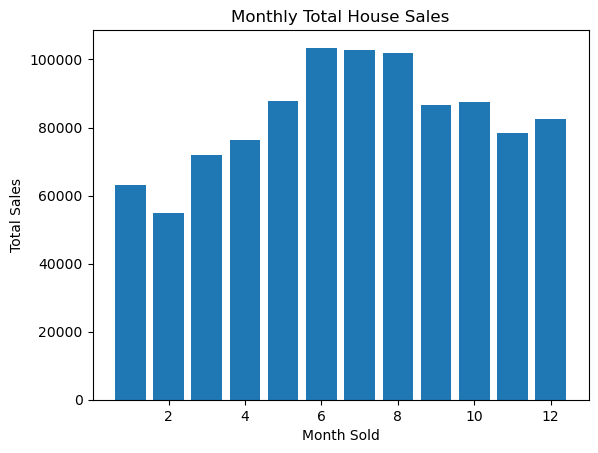

In [429]:
plt.bar(monthly_sales["Month"], monthly_sales["TotalSales"])
plt.title("Monthly Total House Sales")
plt.xlabel("Month Sold")
plt.ylabel("Total Sales")
plt.show()

The most popular months for house sales have been identified based on total sales

Analyze yearly house sales

In [408]:
yearly_sales = houses_sold.groupby('Year')['HousesSold'].sum()

# Find the year with the most houses sold
most_sold_year = yearly_sales.nlargest(1)

# Display the year with the most houses sold
print("Year with the Most Houses Sold:", most_sold_year.index[0])
print("Total Houses Sold:", most_sold_year.iloc[0])


Year with the Most Houses Sold: 2005.0
Total Houses Sold: 79566


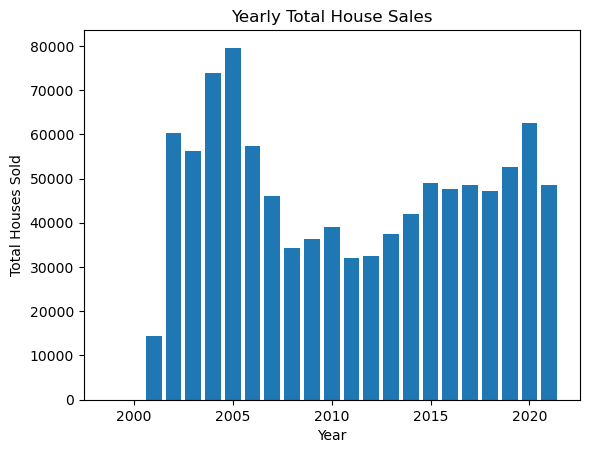

In [431]:
plt.bar(yearly_sales.index, yearly_sales.values)
plt.title("Yearly Total House Sales")
plt.xlabel("Year")
plt.ylabel("Total Houses Sold")
plt.show()

In [409]:
# Find the year with the least houses sold
least_sold_year = yearly_sales.nsmallest(1)
print("Year with the Least Houses Sold:", least_sold_year.index[0])
print("Total Houses Sold:", least_sold_year.iloc[0])

Year with the Least Houses Sold: 1999.0
Total Houses Sold: 1


In [410]:
most_sold_month_per_year = houses_sold.sort_values('HousesSold', ascending=False).drop_duplicates('Year')
most_sold_month_per_year = most_sold_month_per_year.sort_values('Year')
most_sold_month_per_year

,Year,Month,HousesSold
0,1999.0,4.0,1
3,2001.0,10.0,5250
12,2002.0,7.0,6323
24,2003.0,7.0,6281
35,2004.0,6.0,7674
47,2005.0,6.0,8791
61,2006.0,8.0,5854
72,2007.0,7.0,4948
83,2008.0,6.0,3535
100,2009.0,11.0,4197


Identified years with most and least houses sold

Display types of property

In [411]:
property_type_sales = housing_df.groupby('Property Type').size().reset_index(name='TotalSales')
print(property_type_sales)

     Property Type  TotalSales
0       Apartments         486
1       Commercial        1981
2            Condo      105420
3      Four Family        2150
4       Industrial         228
5   Public Utility           5
6      Residential       60728
7    Single Family      401612
8     Three Family       12586
9       Two Family       26408
10     Vacant Land        3163


In [412]:
property_type_sales = housing_df.groupby('Property Type').size().reset_index(name='TotalSales')
property_type_sales_sorted = property_type_sales.sort_values(by='TotalSales', ascending=False)
most_sold_property = property_type_sales_sorted.iloc[0]['Property Type']
print("Most Sold Property Type:", most_sold_property)

Most Sold Property Type: Single Family


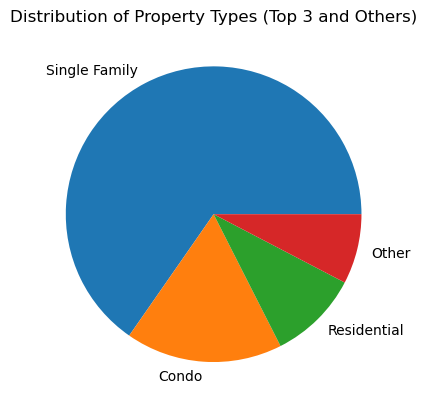

In [462]:
top_3_property_types = property_type_sales_sorted.head(3)
other_property_types = property_type_sales_sorted.iloc[3:]
other_total_sales = other_property_types['TotalSales'].sum()
grouped_data = pd.concat([top_3_property_types, pd.DataFrame({'Property Type': ['Other'], 'TotalSales': [other_total_sales]})])
plt.pie(grouped_data['TotalSales'], labels=grouped_data['Property Type'])
plt.title('Distribution of Property Types (Top 3 and Others)')
plt.show() 

Determined most sold property type

Analyze median price of houses on main roads

In [413]:
merge_df['On_Main_Road'] = merge_df['ROAD_TYPE'].str.contains('M', case=False, regex=True)
median_prices = merge_df.groupby('On_Main_Road')['Sale Amount'].median()
median_prices

On_Main_Road
False    189000.0
True     195000.0
Name: Sale Amount, dtype: float64